In [ ]:
#Project on "Credit Card Fraud Detection Using Machine Learning"

About Dataset
-------------

Context: It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content: 
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transaction

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.s.

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Load the data

cc_df = pd.read_csv("creditcard.csv")
cc_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
#Exploratory Data Analysis

In [12]:
#Print the shape of the data 

cc_df.shape

(284807, 31)

In [13]:
#Describe the data

cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
cc_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [22]:
#Check for null values

cc_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
#Check count of fraud and non-fraud cases

cc_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

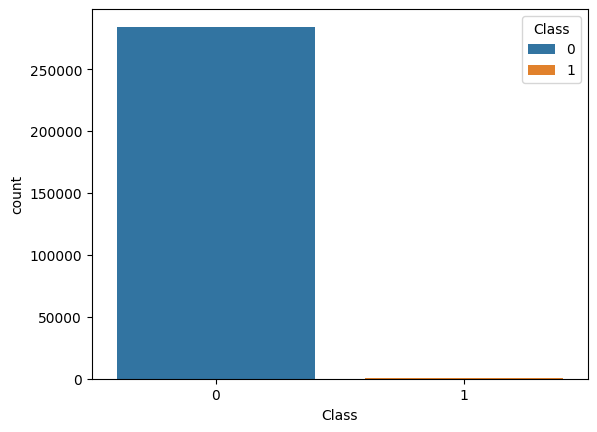

In [24]:
sns.countplot(data=cc_df,x='Class',hue='Class')
plt.show()

The only two features that have not been converted with PCA are Time and Amount. Therefore, we only need to focus on processing these two features.

In [34]:
cc_df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


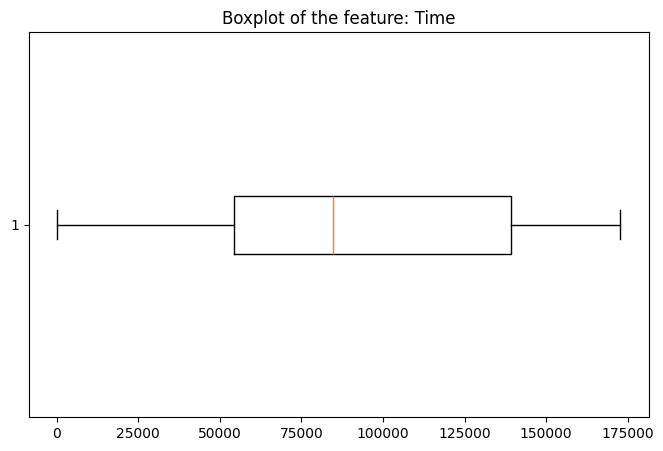

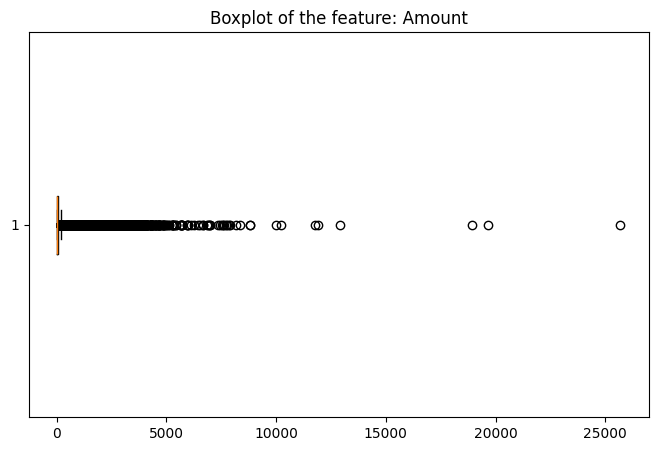

In [36]:
#Check outliers

time_amount = ['Time', 'Amount']

for feature in time_amount:
    fig, ax = plt.subplots(1, 1, figsize = (8, 5))
    plt.boxplot(cc_df[feature].dropna(), vert = False)
    ax.set_title("Boxplot of the feature: " + feature)

In [37]:
#Separating the fraud & normal data for analysis

normal = cc_df[cc_df.Class == 0]
fraud = cc_df[cc_df.Class == 1]

In [39]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [40]:
pd.concat([fraud['Amount'].describe(), normal['Amount'].describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


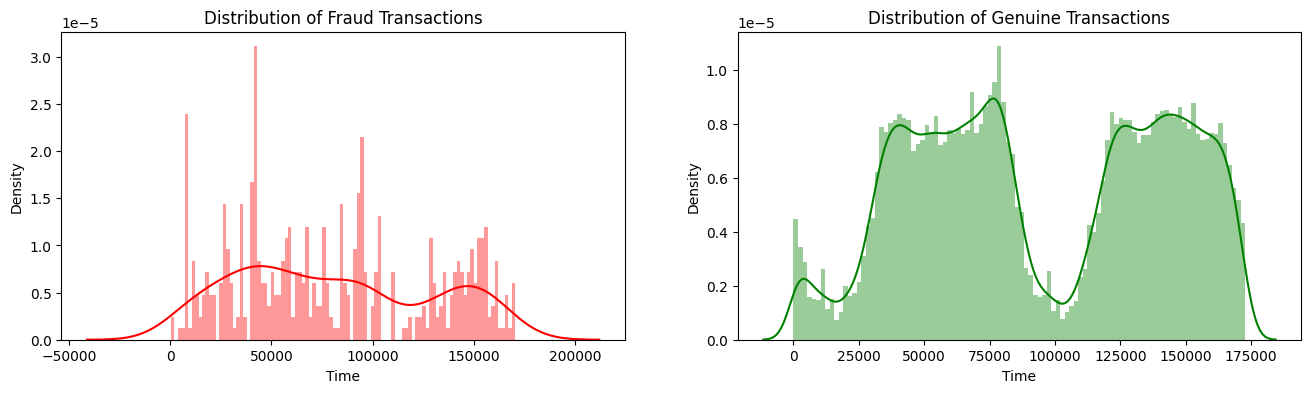

In [43]:
#Check distribution of time for fraud and normal transactions

fig, axs = plt.subplots(1, 2, figsize=(16,4))

sns.distplot(fraud['Time'], bins =100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(normal['Time'], bins =100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

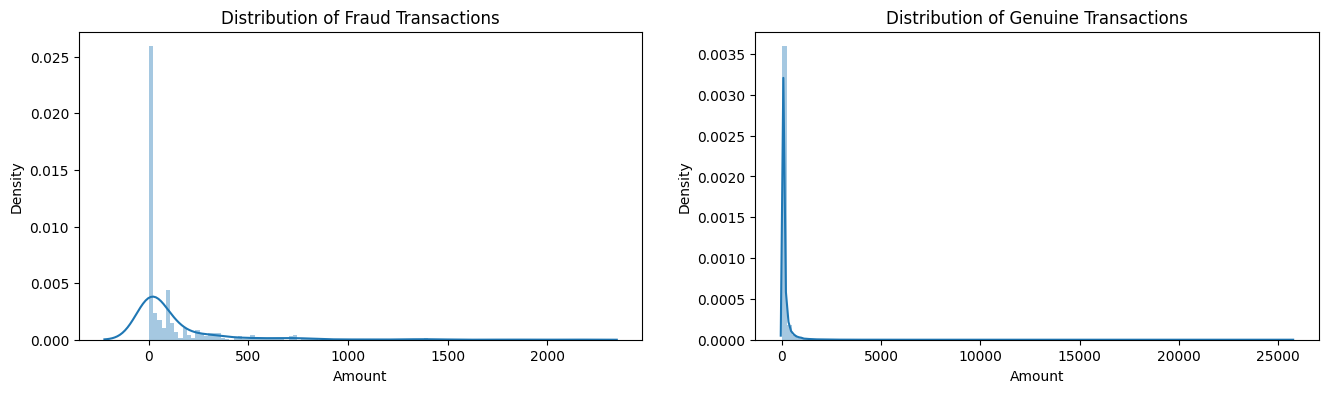

In [44]:
#Check distribution of amount for fraud and normal transactions

fig, axs = plt.subplots(1, 2, figsize=(16,4))

sns.distplot(fraud['Amount'], bins =100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(normal['Amount'], bins =100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

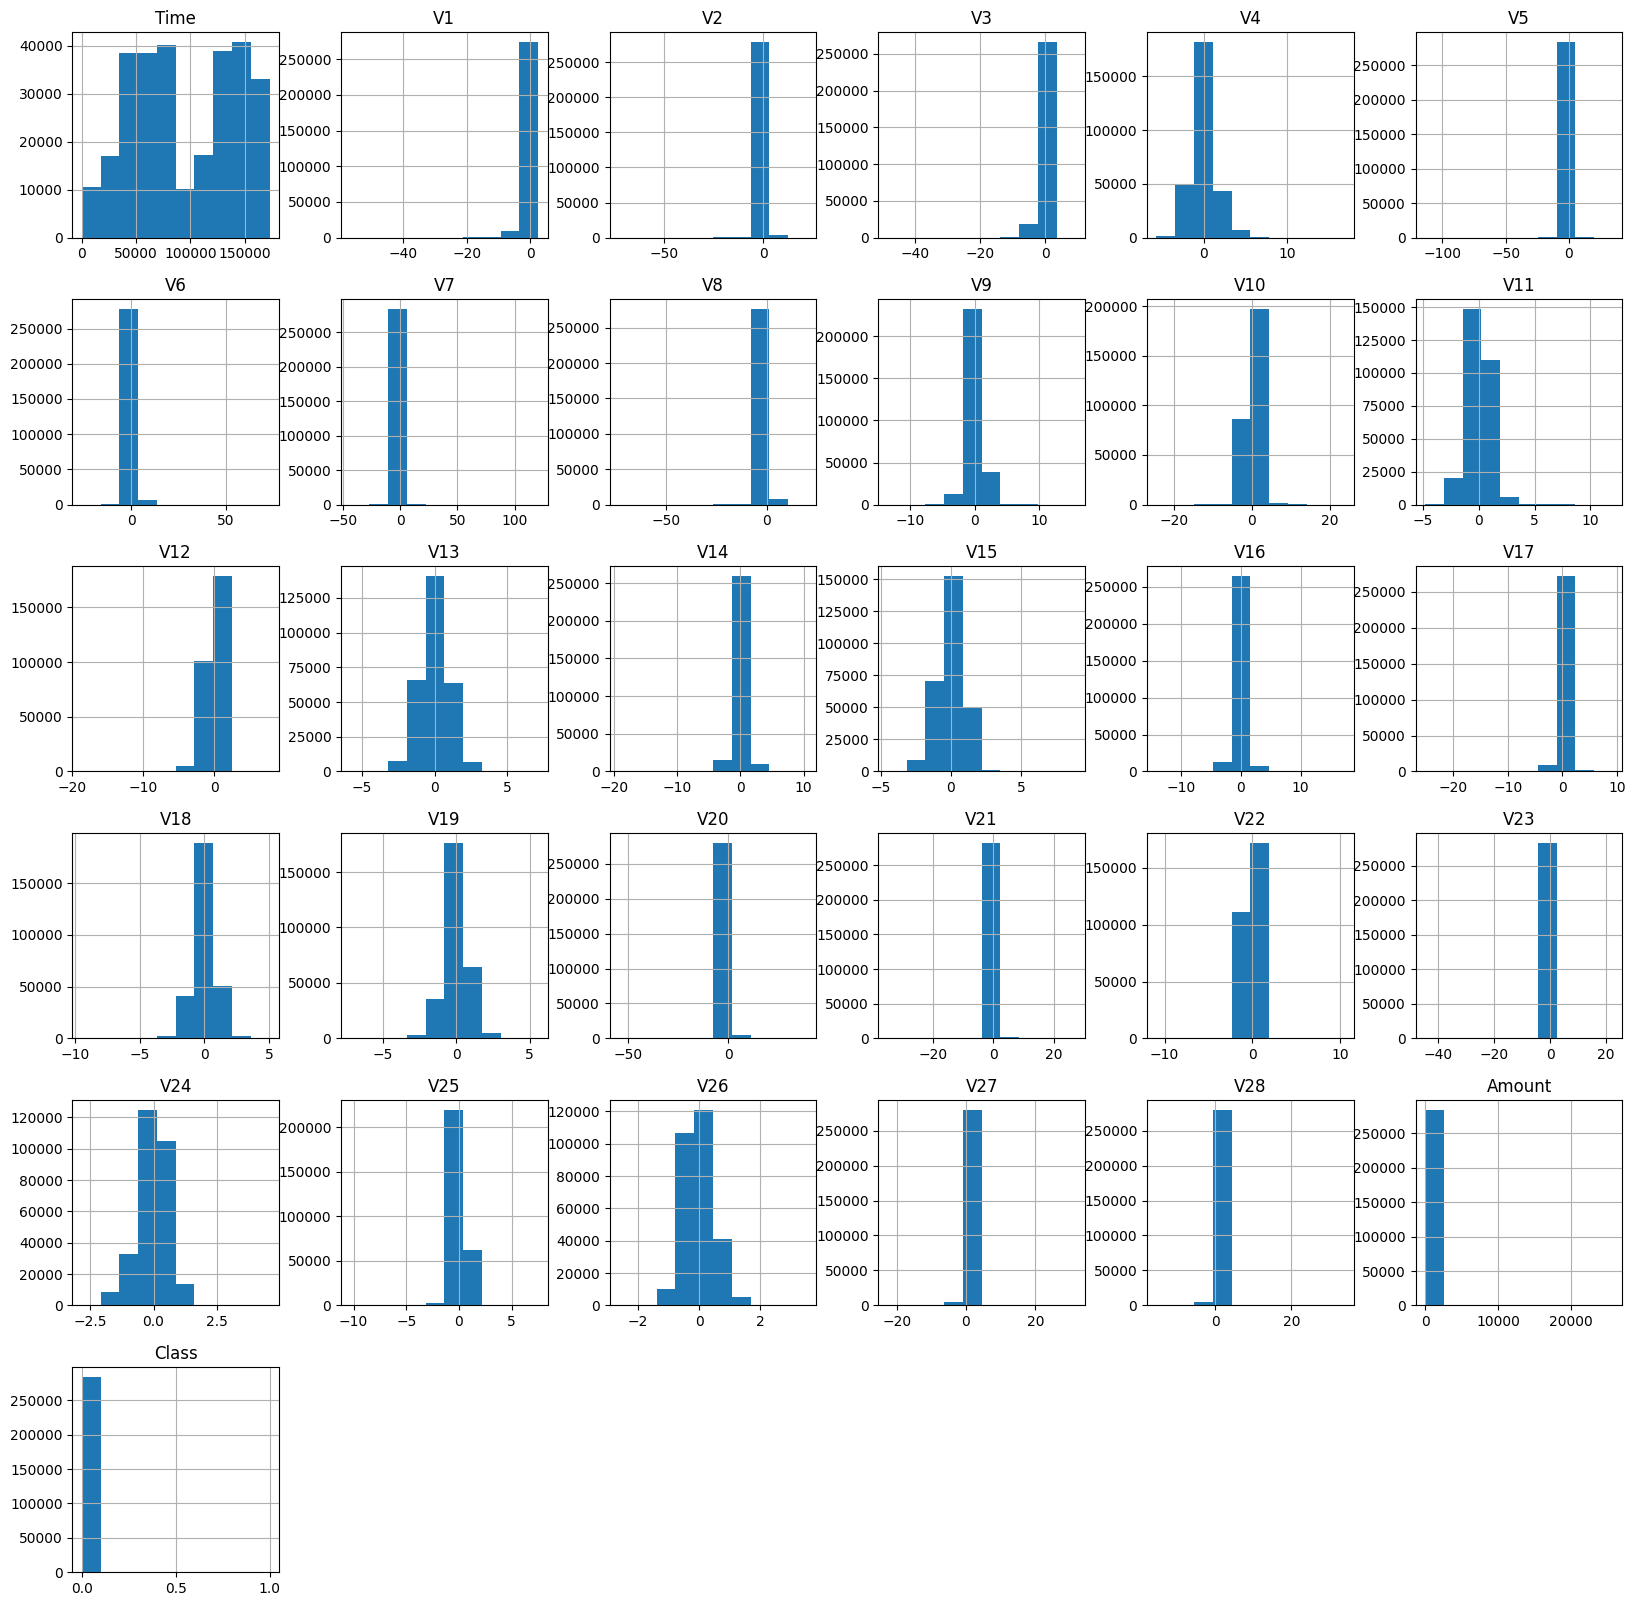

In [45]:
#Show distribution of all varaiables

cc_df.hist(figsize = (20,20))
plt.show()


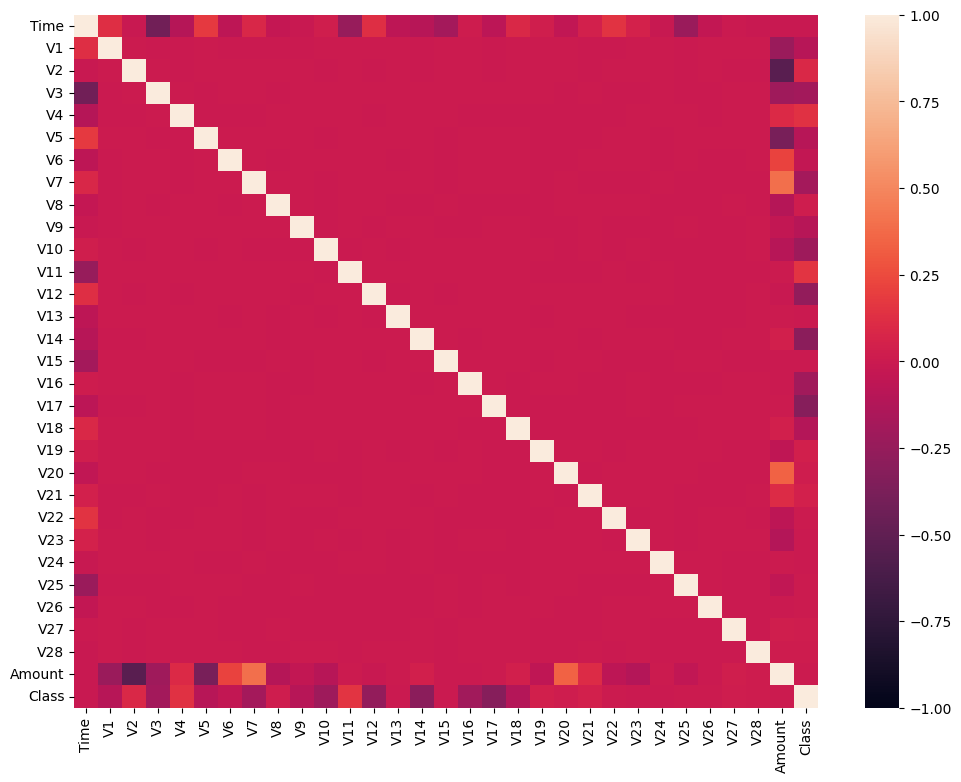

In [47]:
#Correlation matrix

corrmat = cc_df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmin = -1, vmax = 1) 
plt.show()

In [49]:
#Splitting the data into Features & Targets

X = cc_df.drop(columns='Class', axis=1)
Y = cc_df['Class']

print(X.shape) 
print(Y.shape)

(284807, 30)
(284807,)


In [50]:
#Split the data into training and testing sets

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [51]:
print("Shape of train dataset features")
print(X_train.shape)
print("Shape of test dataset features")
print(X_test.shape)
print("Shape of train dataset target")
print(Y_train.shape)
print("Shape of test dataset target")
print(Y_test.shape)

Shape of train dataset features
(227845, 30)
Shape of test dataset features
(56962, 30)
Shape of train dataset target
(227845,)
Shape of test dataset target
(56962,)


In [59]:
#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [60]:
#Logistic Regression

logreg_model = LogisticRegression()

logreg_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test = logreg_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the logistic regression model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))

print("The classification report for the logistic regression model on the test data = ")
print(classification_report(Y_test,Y_pred_test))

print("The confusion matrix for the logistic regression model on the test data = ")
print(confusion_matrix(Y_test,Y_pred_test))

The accuracy score of the logistic regression model on the test data = 
0.9988413328183702
The classification report for the logistic regression model on the test data = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.77      0.56      0.65       109

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962

The confusion matrix for the logistic regression model on the test data = 
[[56835    18]
 [   48    61]]


In [61]:
#Naive Bayes

gnb_model = GaussianNB()

gnb_model.fit(X_train, Y_train)

#Predict the output
Y_pred_test = gnb_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the naive bayes model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))

print("The classification report for the naive bayes model on the test data = ")
print(classification_report(Y_test,Y_pred_test))

print("The confusion matrix for the naive bayes model on the test data = ")
print(confusion_matrix(Y_test,Y_pred_test))

The accuracy score of the naive bayes model on the test data = 
0.9939082195147643
The classification report for the naive bayes model on the test data = 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56853
           1       0.18      0.61      0.28       109

    accuracy                           0.99     56962
   macro avg       0.59      0.80      0.64     56962
weighted avg       1.00      0.99      1.00     56962

The confusion matrix for the naive bayes model on the test data = 
[[56548   305]
 [   42    67]]


In [62]:
#RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100)

rfc_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test = rfc_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the Random Forest Classifier ensemble model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test)),

print("The classification report for the Random Forest Classifier ensemble model on the test data = ")
print(classification_report(Y_test,Y_pred_test))

print("The confusion matrix for the Random Forest Classifier ensemble model on the test data = ")
print(confusion_matrix(Y_test,Y_pred_test))

The accuracy score of the Random Forest Classifier ensemble model on the test data = 
0.9995084442259752
The classification report for the Random Forest Classifier ensemble model on the test data = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.98      0.76      0.86       109

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

The confusion matrix for the Random Forest Classifier ensemble model on the test data = 
[[56851     2]
 [   26    83]]


In [63]:
#Support Vector Machine(SVM)

svm_model = SVC()

svm_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test = svm_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the SVM model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))

print("The classification report for the SVM model on the test data = ")
print(classification_report(Y_test,Y_pred_test))

print("The confusion matrix for the SVM model on the test data = ")
print(confusion_matrix(Y_test,Y_pred_test))

The accuracy score of the SVM model on the test data = 
0.9980864435939749
The classification report for the SVM model on the test data = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.00      0.00      0.00       109

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

The confusion matrix for the SVM model on the test data = 
[[56853     0]
 [  109     0]]


In [67]:
#K-Nearest Neigbour(KNN)

knn_model = KNeighborsClassifier(n_neighbors=4)

knn_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test = knn_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the KNN model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))

print("The classification report for the KNN model on the test data = ")
print(classification_report(Y_test,Y_pred_test))

print("The confusion matrix for the KNN model on the test data = ")
print(confusion_matrix(Y_test,Y_pred_test))

The accuracy score of the KNN model on the test data = 
0.998156665847407
The classification report for the KNN model on the test data = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       1.00      0.04      0.07       109

    accuracy                           1.00     56962
   macro avg       1.00      0.52      0.53     56962
weighted avg       1.00      1.00      1.00     56962

The confusion matrix for the KNN model on the test data = 
[[56853     0]
 [  105     4]]


In [ ]:
==============================================END=============================================================